# Using Python for Research Homework: Week 2

In this homework, we will use the tools we've covered in the past two weeks to create a tic-tac-toe (noughts and crosses) simulator and evaluate basic winning strategies.

### Exercise 1

Tic-tac-toe (or noughts and crosses) is a simple strategy game in which two players take turns placing a mark on a 3x3 board, attempting to make a row, column, or diagonal of three with their mark. In this homework, we will use the tools we've covered in the past two weeks to create a tic-tac-toe simulator and evaluate basic winning strategies.

In the following exercises, we will learn to create a tic-tac-toe board, place markers on the board, evaluate if either player has won, and use this to simulate two basic strategies.

#### Instructions 

- For our tic-tac-toe board, we will use a numpy array with dimension 3 by 3. 
- Make a function `create_board()` that creates such a board with the value of each cell set to the integer `0`.
- Call `create_board()` and store it.

In [43]:
import numpy as np

def create_board():
    return np.zeros((3,3))
    
create_board()

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### Exercise 2

Players 1 and 2 will take turns changing values of this array from a 0 to a 1 or 2, indicating the number of the player who places a marker there.

#### Instructions 

- Create a function `place(board, player, position)`, where:
    - `player` is the current player (an integer 1 or 2).
    - `position` is a tuple of length 2 specifying a desired location to place their marker.
    - Your function should only allow the current player to place a marker on the board (change the board position to their number) if that position is empty (zero).
- Use `create_board()` to store a board as `board`, and use `place` to have Player 1 place a marker on location `(0, 0)`.

In [45]:

def place(board, player, position):
    if board[position] == 0:
        board[position] = player
    return board

board = create_board()
place(board, 1, (0, 0))

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### Exercise 3

In this exercise, we will determine which positions are available to either player for placing their marker.

#### Instructions 
- Create a function `possibilities(board)` that returns a list of all positions (tuples) on the board that are not occupied (0). (Hint: `numpy.where` is a handy function that returns a list of indices that meet a condition.)
- `board` is already defined from previous exercises. Call `possibilities(board)` to see what it returns!

In [46]:
def possibilities(board):
    return list(zip(*np.where(board == 0)))

possibilities(board)


[(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

### Exercise 4

The next step is for the current player to place a marker among the available positions. In this exercise, we will select an available board position at random and place a marker there.

#### Instructions 

- Write a function `random_place(board, player)` that places a marker for the current player at random among all the available positions (those currently set to 0).
    - Find possible placements with `possibilities(board)`.
    - Select one possible placement at random using `random.choice(selection)`.
- `board` is already defined from previous exercises. Call `random_place(board, player)` to place a random marker for Player 2, and store this as board to update its value.

In [47]:
import random 
random.seed(1)

def random_place(board, player):
    selections = possibilities(board)
    if len(selections) > 0:
        selection = random.choice(selections)
        place(board, player, selection)
    return board

random_place(board, 2)


array([[1., 0., 0.],
       [2., 0., 0.],
       [0., 0., 0.]])

### Exercise 5

We will now have both players place three markers each.

#### Instructions 

- A new `board` is already given. Call `random_place(board, player)` to place three pieces each on board for players 1 and 2.
- Print board to see your result.

In [48]:
random.seed(1)
board = create_board()

for i in range(3):
    for player in [1,2]:
        random_place(board, player)
        
print(board)

[[2. 2. 1.]
 [0. 1. 0.]
 [0. 1. 2.]]


### Exercise 6

In the next few exercises, we will make functions that check whether either player has won the game.

#### Instructions 
- Make a function `row_win(board, player)` that takes the player (integer) and determines if any row consists of only their marker. 
    - Have it return `True` if this condition is met and `False` otherwise.
- `board` is already defined from previous exercises. Call `row_win` to check if Player 1 has a complete row.

In [74]:
def check_row(row, player):
    for marker in row:
        if marker != player:
            return False
    return True

def row_win(board, player):
    for row in board:
        if check_row(row, player):
            return True
    return False  

row_win(board, 1)

False

### Exercise 7

In the next few exercises, we will make functions that verify if either player has won the game.

#### Instructions 
- Make a function `col_win(board, player)` that takes the player (integer) and determines if any column consists of only their marker. 
    - Have it return `True` if this condition is met and `False` otherwise.
- `board` is already defined from previous exercises. Call `col_win` to check if Player 1 has a complete row.

In [75]:
def col_win(board, player):
    for row in board.T:
        if check_row(row, player):
            return True
    return False

col_win(board, 1)


False

### Exercise 8

In the next few exercises, we will make functions that verify if either player has won the game.

#### Instructions 
- Finally, create a function `diag_win(board, player)` that tests if either diagonal of the board consists of only their marker. Have it return `True` if this condition is met, and `False` otherwise.
- `board` has been slightly modified from a previous exercise. Call `diag_win` to check if Player 2 has a complete diagonal.

In [76]:
board[1,1] = 2


def diag_win(board, player):
    main_diag = board.diagonal()
    anti_diag = np.flipud(board).diagonal()[::-1]
    return check_row(main_diag, player) or check_row(anti_diag, player)
              
diag_win(board, 2)
    

True

### Exercise 9

In the next few exercises, we will make functions that check whether either player has won the game.

#### Instructions 
- Create a function `evaluate(board)` that uses `row_win`, `col_win`, and `diag_win` functions for both players. If one of them has won, return that player's number. If the board is full but no one has won, return -1. Otherwise, return 0.
- `board` is already defined from previous exercises. Call evaluate to see if either player has won the game yet.

In [77]:
def evaluate(board):
    winner = 0
    for player in [1, 2]:
        if row_win(board, player) or col_win(board, player) or diag_win(board, player):
            winner = player
    if np.all(board != 0) and winner == 0:
        winner = -1
    return winner

evaluate(board)

2

### Exercise 10

In this exercise, we will use all the functions we have made to simulate an entire game.

#### Instructions 

- `create_board()`, `random_place(board, player)`, and `evaluate(board)` have been created in previous exercises. Create a function `play_game()` that:
    - Creates a board.
    - Alternates taking turns between two players (beginning with Player 1), placing a marker during each turn.
    - Evaluates the board for a winner after each placement.
    - Continues the game until one player wins (returning 1 or 2 to reflect the winning player), or the game is a draw (returning -1).
- Call play_game 1000 times, and store the results of the game in a list called `results`.

In [78]:
random.seed(1)
import matplotlib.pyplot as plt
import numpy as np
results = []
def play_game():
    board = create_board()
    winner = 0
    while winner == 0:
        for player in [1, 2]:
            random_place(board, player)
            winner = evaluate(board)
            if winner != 0:
                break
    return winner


random.seed(1)
results.append([play_game() for i in range(1000)])

res = np.array(results)

unique, counts = np.unique(res, return_counts=True)
dict(zip(unique, counts))



{-1: 123, 1: 591, 2: 286}

#### Exercise 11

In the previous exercise, we see that when guessing at random, it's better to go first, as expected. Let's see if Player 1 can improve their strategy. 

#### Instructions 
- Create a function `play_strategic_game()`, where Player 1 always starts with the middle square, and otherwise both players place their markers randomly.
- Call `play_strategic_game` 1000 times.

In [79]:
import random
import numpy as np
random.seed(1)

results1 = []
def play_strategic_game():
    board, winner = create_board(), 0
    board[1, 1] = 1
    while winner == 0:
        for player in [2, 1]:
            random_place(board, player)
            winner = evaluate(board)
            if winner != 0:
                break
    return winner

results1.append([play_strategic_game() for i in range(1000)])
res1 = np.array(results1)

unique1, counts1 = np.unique(res1, return_counts=True)
dict(zip(unique1, counts1))

{-1: 90, 1: 716, 2: 194}

In [80]:
random.seed(1)
def play_strategic_game():
    board, winner = create_board(), 0
    board[1,1] = 1
    while winner == 0:
        for player in [2,1]:
            board = random_place(board, player)
            winner = evaluate(board)
            if winner != 0:
                break
    return winner    

#Call play_strategic_game once.

play_strategic_game() 

2

In [81]:
random.seed(1)
ITERATIONS = 1000
result2 = []
for i in range(ITERATIONS):
    result2.append(play_strategic_game()) 
    
res2 = np.array(result2)
unique2, counts2 = np.unique(res2, return_counts=True)
dict(zip(unique2, counts2))

{-1: 90, 1: 716, 2: 194}

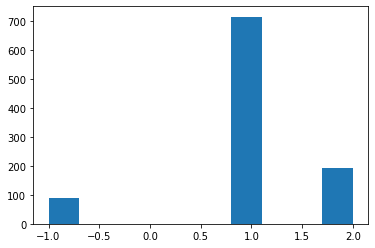

In [82]:
import matplotlib.pyplot as plt
plt.hist(result2)
plt.savefig('tic_tac_toe_Hist_2.pdf')
plt.show()

0.38133811950683594


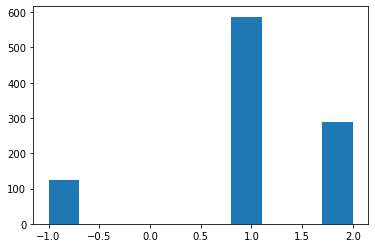

In [83]:
import time
start = time.time()
games = [play_game() for i in range(1000)]
stop = time.time()
print(stop - start)
plt.hist(games)
plt.show()